# КЛАССИФИКАЦИЯ ОПУХОЛИ В ГРУДИ У ЖЕНЩИНЫ ПО ОПИСАНИЯМ СНИМКОВ

## <u>Задание 1. Подготовка и анализ данных</u>

Для выполнения проекта необходимы следующие библиотеки и программное обеспечение:

Python 3.12+;  
Jupyter Notebook;  
NumPy;  
Pandas;  
Matplotlib;  
Sklearn.  

In [3]:
import sys
print(sys.version)

3.12.9 (main, Mar 25 2025, 16:37:06) [Clang 16.0.0 (clang-1600.0.26.4)]


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

<div class="alert alert-block alert-success">
<b>Окружение для выполнения проекта настроено</b>
</div>

#### 1. Загрузка датасета 

In [27]:
df = pd.read_csv("/Users/vasilkowa/Desktop/school/AI_ITS_02.ID_1567848-1/src/breast-cancer.csv")
print(pd.read_csv("/Users/vasilkowa/Desktop/school/AI_ITS_02.ID_1567848-1/src/breast-cancer.csv").head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_wor

___Получение основной информации о датасете___


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

___Получение описательной статистики датасета___

In [29]:
print(df.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

### Описание данных

___Количество строк в датасете:___ 569 (начало от 0 до 568), каждая строка содержит информацию для одного случая обнаружения опухоли груди/данные для одной пациентки.     
___Количество столбцов:___ 32, где каждому столбцу соответствуют различные числовые характеристики данной опухоли.  

___Ячейки:___

***id***  
***Уникальный идентификатор***

***diagnosis***  
___Диагноз:___ целевая ячейка, содержащая информацю о классе.  
M — злокачественная (Malignant) опухоль;
B — доброкачественная (Benign) опухоль.

___Числовые характеристики опухоли:___  
разделяются на 3 группы:
- mean — средние значения признаков
- se — стандартные ошибки этих признаков
- worst — наихудшие значения (в пределах образца опухоли)

---

#### _mean ####
---

***1. radius_mean***  
***Средний радиус долек/ядра клетки:*** тип данных с плавающей точкой, пропусков нет.  
- большие значения могут свидетельствовать о злокачественности. 

***2. texture_mean***  
***Средняя текстура поверхности и степень ее неоднородности:*** тип данных с плавающей точкой, пропусков нет.  
- отражает вариативность интенсивности на изображении ядер клеток.

***3. perimeter_mean***  
***Средний периметр ядра клетки:*** тип данных с плавающей точкой, пропусков нет.  
- увеличенный и неровный периметр может быть признаком злокачественной опухоли.
- коррелирует с радиусом. 

***4. area_mean***  
***Средняя площадь ядра клетки:*** тип данных с плавающей точкой, пропусков нет.  
- важный диагностический параметр, поскольку злокачественные клетки часто имеют большую площадь в связи с гиперплазией. 

***5. smoothness_mean***  
***Средняя гладкость контура:*** тип данных с плавающей точкой, пропусков нет.  
- более гладкие контуры (ниже значения) чаще соответствуют доброкачественным образованиям.
- низкое значение может указывать на более агрессивный тип опухоли.

***6. compactness_mean***  
***Средняя компактность:*** тип данных с плавающей точкой, пропусков нет.  
- соотношение площади к квадрату периметра.
- высокая компактность может указывать на злокачественные образования.

***7. concavity_mean***  
***Средняя вогнутость:*** тип данных с плавающей точкой, пропусков нет. 
- большие значения чаще встречаются при злокачественных опухолях.

***8. concave_points_mean***  
***Среднее количество вогнутых точек на контуре:*** тип данных с плавающей точкой, пропусков нет.  
- увеличение связано с признаками злокачественности.

***9. symmetry_mean***  
***Средняя симметричност ядра:*** тип данных с плавающей точкой, пропусков нет. 
- более выраженная асимметрия может указывать на опухолевую трансформацию.

***10. fractal_dimension_mean***  
***Средняя фрактальная размерность:*** тип данных с плавающей точкой, пропусков нет. 
- показатель сложности границы ядра.
- чем выше значение, тем более изломанная и сложная форма.

---
#### _se ####  
---

Описывают изменчивость признаков внутри одной опухоли.  
- radius_se — разброс радиуса ядер
- concavity_se — насколько различаются вогнутости

__!__ Злокачественные опухоли чаще имеют высокую изменчивость, что отражает их гетерогенность.

***11. radius_se***  
***Стандартная ошибка радиуса:*** тип данных с плавающей точкой, пропусков нет.  

***12. texture_se***  
***Стандартная ошибка текстуры:*** тип данных с плавающей точкой, пропусков нет.  

***13. perimeter_se***  
***Стандартная ошибка периметра:*** тип данных с плавающей точкой, пропусков нет.  

***14. area_se***  
***Стандартная ошибка площади:*** тип данных с плавающей точкой, пропусков нет.  

***15. smoothness_se***  
***Стандартная ошибка гладкости:*** тип данных с плавающей точкой, пропусков нет.  

***16. compactness_se***  
***Стандартная ошибка компактности:*** тип данных с плавающей точкой, пропусков нет.  

***17. concavity_se***  
***Стандартная ошибка вогнутости:*** тип данных с плавающей точкой, пропусков нет.  

***18. concave_points_se***  
***Стандартная ошибка количества вогнутых точек:*** тип данных с плавающей точкой, пропусков нет.  

***19. symmetry_se***  
***Стандартная ошибка симметрии:*** тип данных с плавающей точкой, пропусков нет.  

***20. fractal_dimension_se***  
***Стандартная ошибка фрактальной размерности:*** тип данных с плавающей точкой, пропусков нет.

---
#### _worst ####
---

Это максимальные значения, полученные по каждому признаку из трёх ядер клетки. Очень информативны, поскольку захватывают наихудший сценарий:
- radius_worst, perimeter_worst, area_worst — отражают максимальные размеры клеток.
- smoothness_worst, concavity_worst, symmetry_worst — подчеркивают аномальные особенности.

__!__ Используются в лучших моделях для классификации.

***21. radius_worst***  
***Наибольший радиус:*** тип данных с плавающей точкой, пропусков нет.  

***22. texture_worst***  
***Наибольшая текстура:*** тип данных с плавающей точкой, пропусков нет.  

***23. perimeter_worst***  
***Наибольший периметр:*** тип данных с плавающей точкой, пропусков нет.  

***24. area_worst***  
***Наибольшая площадь:*** тип данных с плавающей точкой, пропусков нет.  

***25. smoothness_worst***  
***Наибольшая гладкость:*** тип данных с плавающей точкой, пропусков нет.  

***26. compactness_worst***  
***Наибольшая компактность:*** тип данных с плавающей точкой, пропусков нет.  

***27. concavity_worst***  
***Наибольшая вогнутость:*** тип данных с плавающей точкой, пропусков нет.  

***28. concave_points_worst***  
***Наибольшее количество вогнутых точек:*** тип данных с плавающей точкой, пропусков нет.  

***29. symmetry_worst***  
***Наибольшая симметрия:*** тип данных с плавающей точкой, пропусков нет.  

***30. fractal_dimension_worst***  
***Наибольшая фрактальная размерность:*** тип данных с плавающей точкой, пропусков нет.  


___Проверка дублированных строк:___

In [30]:
duplicates = df.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

Количество дубликатов: 0


___Проверка наличия нулевых значений, требующих обработки:___

In [31]:
columns_to_check = [col for col in df.columns if col not in ['id', 'diagnosis']]
for column in columns_to_check:
    print(f"{column}: {df[column].value_counts().get(0, 0)} нулевых значений")

radius_mean: 0 нулевых значений
texture_mean: 0 нулевых значений
perimeter_mean: 0 нулевых значений
area_mean: 0 нулевых значений
smoothness_mean: 0 нулевых значений
compactness_mean: 0 нулевых значений
concavity_mean: 13 нулевых значений
concave points_mean: 13 нулевых значений
symmetry_mean: 0 нулевых значений
fractal_dimension_mean: 0 нулевых значений
radius_se: 0 нулевых значений
texture_se: 0 нулевых значений
perimeter_se: 0 нулевых значений
area_se: 0 нулевых значений
smoothness_se: 0 нулевых значений
compactness_se: 0 нулевых значений
concavity_se: 13 нулевых значений
concave points_se: 13 нулевых значений
symmetry_se: 0 нулевых значений
fractal_dimension_se: 0 нулевых значений
radius_worst: 0 нулевых значений
texture_worst: 0 нулевых значений
perimeter_worst: 0 нулевых значений
area_worst: 0 нулевых значений
smoothness_worst: 0 нулевых значений
compactness_worst: 0 нулевых значений
concavity_worst: 13 нулевых значений
concave points_worst: 13 нулевых значений
symmetry_worst: 0 

___Колонки с нулевыми значениями___(всего 13 нулей в каждой):
- concavity_mean
- concave points_mean
- concavity_se
- concave points_se
- concavity_worst
- concave points_worst

Эти признаки связаны с выпуклостью опухоли и играют роль в дифференциации доброкачественных и злокачественных образований, поэтому нули, скорее всего, означают отсутствие выпуклых участков, а не пропущенные значения.

Впоследствии, если модель будет плохо обучаться, можно попробовать заменить нули на медианные значения. 

___Проверка на выбросы:___

Выбросы по id и diagnosis необходимо исключить, поскольку они не имеют информативности, поэтому оставлен только тип данных float, который соответсвует всем значимым параметрам. 

In [32]:
numeric_data = df.select_dtypes(include=['float64'])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((numeric_data < lower_bound) | (numeric_data > upper_bound))
outliers_count = outliers.sum()
print(outliers_count)



radius_mean                14
texture_mean                7
perimeter_mean             13
area_mean                  25
smoothness_mean             6
compactness_mean           16
concavity_mean             18
concave points_mean        10
symmetry_mean              15
fractal_dimension_mean     15
radius_se                  38
texture_se                 20
perimeter_se               38
area_se                    65
smoothness_se              30
compactness_se             28
concavity_se               22
concave points_se          19
symmetry_se                27
fractal_dimension_se       28
radius_worst               17
texture_worst               5
perimeter_worst            15
area_worst                 35
smoothness_worst            7
compactness_worst          16
concavity_worst            12
concave points_worst        0
symmetry_worst             23
fractal_dimension_worst    24
dtype: int64


___Поиск аномалий:___

In [33]:
for col in numeric_data.columns:
    if (numeric_data[col] < 0).any():
        print(f"Аномальные отрицательные значения найдены в {col}")
    else: 
        print(f"Аномальные значения в {col} не выявлены")

Аномальные значения в radius_mean не выявлены
Аномальные значения в texture_mean не выявлены
Аномальные значения в perimeter_mean не выявлены
Аномальные значения в area_mean не выявлены
Аномальные значения в smoothness_mean не выявлены
Аномальные значения в compactness_mean не выявлены
Аномальные значения в concavity_mean не выявлены
Аномальные значения в concave points_mean не выявлены
Аномальные значения в symmetry_mean не выявлены
Аномальные значения в fractal_dimension_mean не выявлены
Аномальные значения в radius_se не выявлены
Аномальные значения в texture_se не выявлены
Аномальные значения в perimeter_se не выявлены
Аномальные значения в area_se не выявлены
Аномальные значения в smoothness_se не выявлены
Аномальные значения в compactness_se не выявлены
Аномальные значения в concavity_se не выявлены
Аномальные значения в concave points_se не выявлены
Аномальные значения в symmetry_se не выявлены
Аномальные значения в fractal_dimension_se не выявлены
Аномальные значения в radius_w

___Распределение по колонкам у разных параметров целевого признака:___

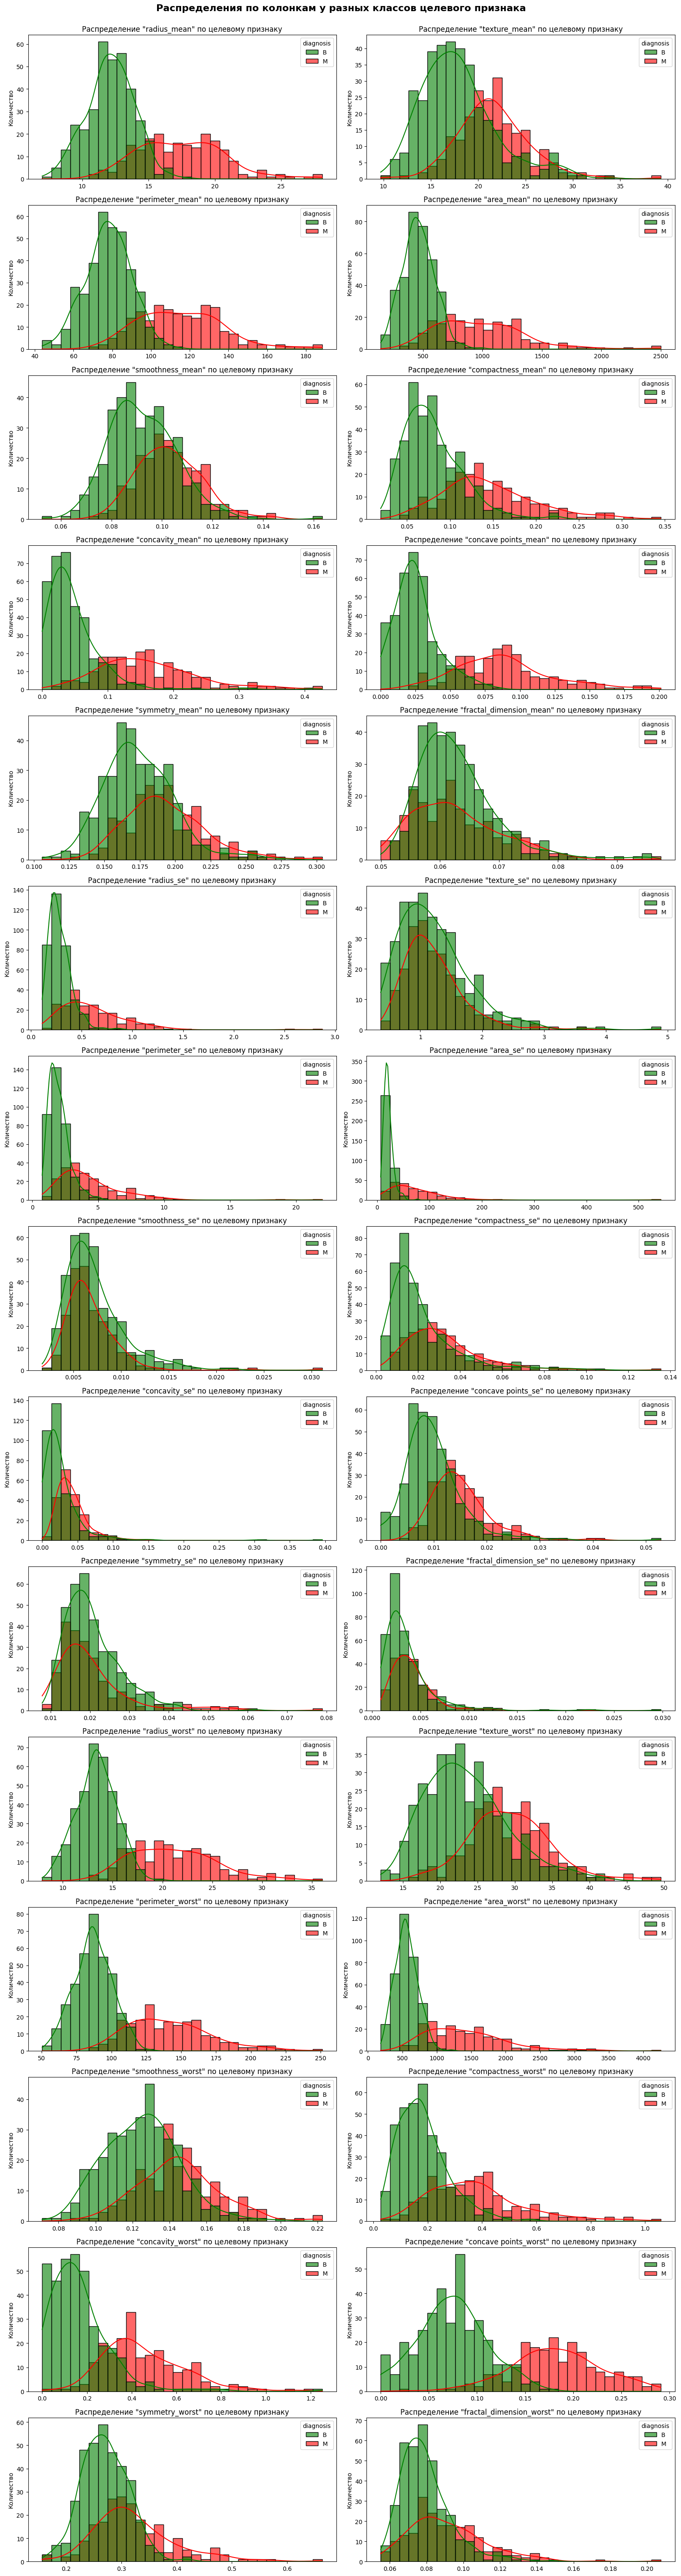

In [34]:
custom_palette = {'M': 'red', 'B': 'green'}
ncols = 2
numeric_columns = numeric_data.columns
nrows = (len(numeric_columns) + ncols - 1) // ncols 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 4 * nrows))
axes = axes.flatten()

target_col = 'diagnosis'
df[target_col] = df[target_col].astype('category')

for i, column in enumerate(numeric_columns):
    sns.histplot(data=df, x=column, hue=target_col, kde=True,
                 palette=custom_palette, bins=30, alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Распределение "{column}" по целевому признаку')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Количество')
    
fig.suptitle("Распределения по колонкам у разных классов целевого признака",
             fontsize=16, fontweight="bold", y=1)
plt.tight_layout()
plt.show()

___Попарное сравнение признаков (построение тепловой карты корреляций):___

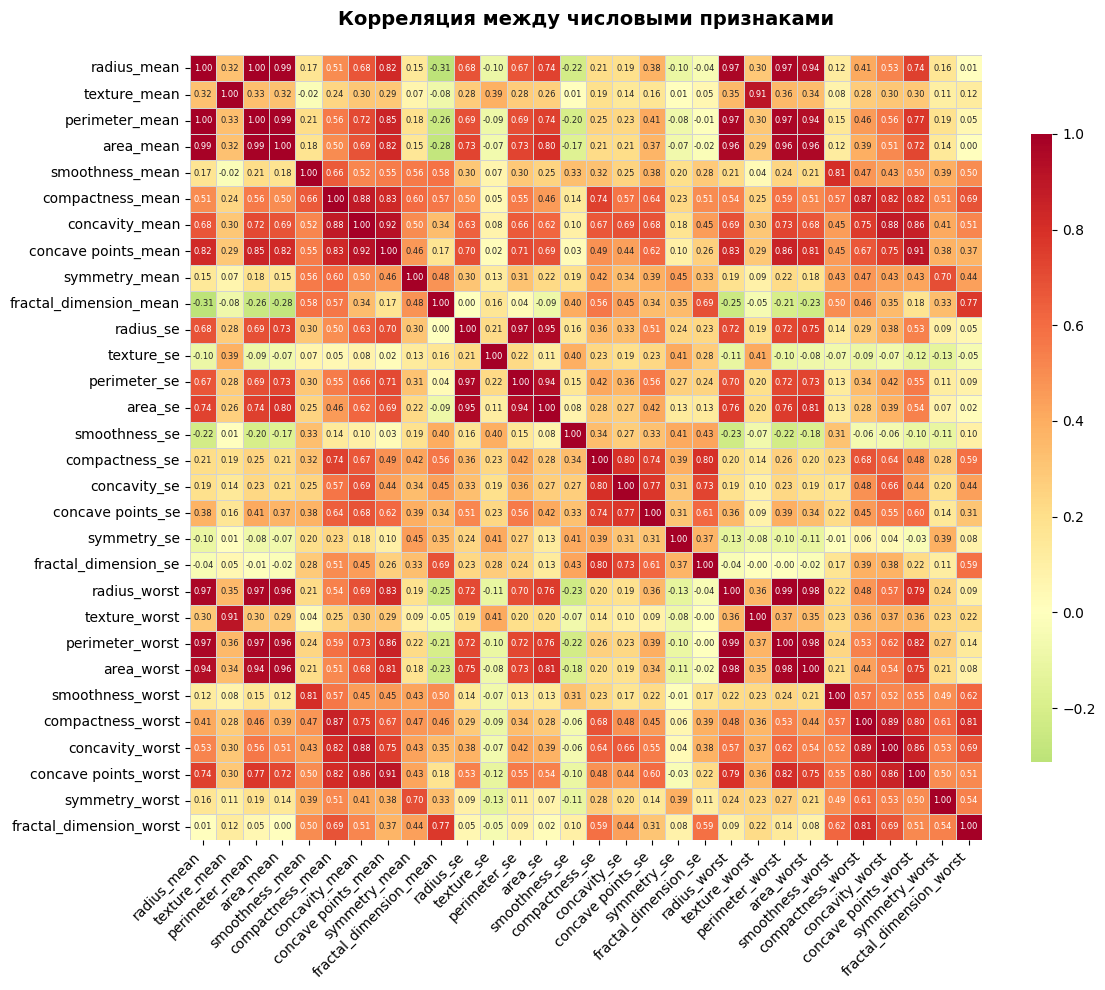

In [35]:
plt.figure(figsize=(12, 10))

# Построение тепловой карты
sns.heatmap(
    numeric_data.corr(),
    annot=True,
    fmt=".2f",
    cmap="RdYlGn_r",        # можно заменить на "coolwarm" или "vlag"
    center=0,
    linewidths=0.5,
    linecolor='lightgray',
    annot_kws={"size": 6},
    cbar_kws={"shrink": 0.8, "aspect": 30}
)

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Корреляция между числовыми признаками\n", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()


#### 2. Разделение датасета на обучающий и тестовый

Для разделения на тестовый и обучающий наборы можно принять <u>признаки за __X__</u>, а <u>целевой признак за __у__</u>. 

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X = df.drop(['id', 'diagnosis'], axis=1)
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Размер обучающего набора X: {X_train.shape}")
print(f"Размер тестового набора X: {X_test.shape}")
print(f"Размер обучающего набора y: {y_train.shape}")
print(f"Размер тестового набора y: {y_test.shape}")

Размер обучающего набора X: (455, 30)
Размер тестового набора X: (114, 30)
Размер обучающего набора y: (455,)
Размер тестового набора y: (114,)


#### 3. Нормализация данных

In [38]:
from sklearn.preprocessing import StandardScaler

___Проверка масштабирования признаков___

In [39]:
print("Train mean:", X_train_scaled.mean(axis=0))  # Должно быть ~0
print("Test mean:", X_test_scaled.mean(axis=0))    # Не точно 0, но близко

Train mean: [-1.73731603e-16  3.90408097e-16  4.70441756e-16 -1.17122429e-16
  7.24207019e-16 -5.07530526e-17 -4.48969311e-17  2.92806072e-17
  2.34244858e-17  3.66983611e-16  1.67875482e-16 -8.97938622e-17
 -2.49861182e-16  1.44450996e-16 -1.56163239e-16 -1.56163239e-17
  4.68489716e-17 -1.40546915e-16  8.58897812e-17 -2.34244858e-17
 -3.96264218e-16  2.18628534e-16 -2.98662194e-16 -1.56163239e-17
 -1.52259158e-16 -1.13218348e-16 -4.48969311e-17  3.02566275e-17
 -4.84106040e-16  3.00614234e-16]
Test mean: [-0.05414764 -0.14911467 -0.04989921 -0.06500861  0.12826808  0.04691087
 -0.02354492 -0.01201802 -0.06059775  0.05935098 -0.10357701 -0.00930521
 -0.10710594 -0.09728456  0.25507977  0.0438618  -0.01950142  0.08383357
  0.06950414  0.05480045 -0.08393173 -0.18710871 -0.0876167  -0.08568405
  0.06076647 -0.03988635 -0.07016511 -0.06611696 -0.10209798 -0.048919  ]


Признаки масштабированы, отрицательные значения являются вариантом нормы. 

<div class="alert alert-block alert-success">
<b>Нормализация данных прошла успешно.</b>
</div>

## <u>Задание 2. Создание и обучение моделей машинного обучения</u>

### 1. Подбор модели и ее обучение. 

In [43]:
from sklearn.metrics import accuracy_score, classification_report

___1) Support Vector Classification (SVC)___

In [44]:
from sklearn.svm import SVC

In [50]:
svc_model = SVC(kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)

print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           B       0.91      0.97      0.94        72
           M       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114



Общая точность модели 92%, что является достаточно высоким значением. При этом модель лучше выявляет случаи доброкачественности и пропускает 17% злокачественных образований, что может быть крайне опасно. 

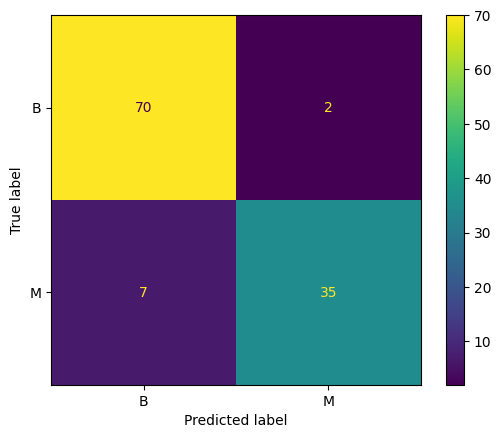

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc) 

При помощи матрицы ошибок можно понять, сколько злокачественных опухолей было ошибочно предсказано как доброкачественные. 

___2) LogisticRegression___

In [48]:
from sklearn.linear_model import LogisticRegression

In [83]:
lr = LogisticRegression(max_iter=10000, tol=1e-5, random_state=42, warm_start=True)  
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Общая точность модели 96%, что является очень высоким значением. Хорошие показатели для доброкачественных опухолей: 96% - сопадение предсказания и истинной доброкачественности, 99% - нахождение реальных доброкаечственных образований и почти максимально возможный баланс между точностью и полнотой. Для злокачественных образований показатели хорошие, но несколько ниже. 7% случаев оказываются ложноотрицательными, что в свою очередь требует внимания. 

___3) DecisionTree___

In [51]:
from sklearn.tree import DecisionTreeClassifier

В данном случае масштабирование не нужно:

In [55]:
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)

print(classification_report(y_test, y_pred_dt))


              precision    recall  f1-score   support

           B       0.89      0.97      0.93        72
           M       0.94      0.79      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114



Общая точность модели 90%, что хорошо, но ниже в сравнении с остальными моделями. Модель лучше выявляет доброкачественные опухоли, чем злокачественные. Очень высокое значение (21%) ложноположительных срабатываний, что может нести угрозу при классификации заболевания. 

___4) RandomForest___

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [57]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



Общая точность модели 97% - хороший показатель. Фактически идеальные значения по определению доброкачественных опухолей, обнаруживает 100: опухолей без пропусков при 4% ложных тревог. Минимальные ошибки при классификации злокачественных опухолей, нулевые ложные срабатывания, однако пропускает 7% опасных случаев. 

### 2. Изменение параметров моделей (GridSearch из sklearn)

___1) Support Vector Classification (SVC)___

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid_svc = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale']
}
grid_svc = GridSearchCV(
    SVC(), 
    param_grid_svc, 
    cv=3, 
    scoring='accuracy', 
    n_jobs=-1, 
    verbose=1)

grid_svc.fit(X_train, y_train)

print("Лучшие параметры для SVC:", grid_svc.best_params_)
print("Лучшая точность:", grid_svc.best_score_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Лучшие параметры для SVC: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Лучшая точность: 0.9604537004763564


___2) LogisticRegression___

In [86]:
from sklearn.model_selection import GridSearchCV
param_grid_lr = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1],
    'solver': ['lbfgs'],
    'max_iter': [5000, 10000],
    'tol': [1e-3, 1e-4]
}


grid_lr = GridSearchCV(
    estimator=lr,
    param_grid=param_grid_lr,
    cv=5, 
    scoring='f1_macro', 
    n_jobs=-1,
    verbose=1
)

grid_lr.fit(X_train_scaled, y_train)

print("Лучшие параметры для LogisticRegression:", grid_lr.best_params_)
print("Лучшая точность:", grid_lr.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Лучшие параметры для LogisticRegression: {'C': 1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs', 'tol': 0.001}
Лучшая точность: 0.971482426532944


___3) DecisionTree___

In [62]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train, y_train)

print("Лучшие параметры для Decision Tree:", grid_dt.best_params_)
print("Лучшая точность:", grid_dt.best_score_)


Лучшие параметры для Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Лучшая точность: 0.9384615384615385


___4) RandomForest___

In [63]:
from sklearn.ensemble import RandomForestClassifier

param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train, y_train)

print("Лучшие параметры для Random Forest:", grid_rf.best_params_)
print("Лучшая точность:", grid_rf.best_score_)

Лучшие параметры для Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Лучшая точность: 0.9670329670329672


### 3. Выбор лучшего набора параметров и обучение с лучшими параметрами на тренировочном наборе данных

___1) Support Vector Classification (SVC)___

In [68]:
best_svc = SVC(**grid_svc.best_params_)
best_svc.fit(X_train, y_train)

SVC(C=1, kernel='linear')

___2) LogisticRegression___

In [87]:
best_lr = LogisticRegression(**grid_lr.best_params_)
best_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1, max_iter=5000, tol=0.001)

___3) DecisionTree___

In [69]:
best_dt = DecisionTreeClassifier(**grid_dt.best_params_)
best_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_split=5)

___4) RandomForest___

In [70]:
best_rf = RandomForestClassifier(**grid_rf.best_params_)
best_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=50)

## <u>Задание 3. Оценка качества модели</u>

### 1. Тестирование на тестовой выборке

In [89]:
y_pred_svc = best_svc.predict(X_test)
y_pred_lr = best_lr.predict(X_test_scaled)
y_pred_dt = best_dt.predict(X_test)
y_pred_rf = best_rf.predict(X_test)

print("Accuracy SVC:", accuracy_score(y_test, y_pred_svc))
print("Classification Report SVC:\n", classification_report(y_test, y_pred_svc))
print("-"*55)
print("Accuracy LogisticRegression:", accuracy_score(y_test, y_pred_lr))
print("Classification Report LogisticRegression:\n", classification_report(y_test, y_pred_lr))
print("-"*55)
print("Accuracy Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("Classification Report Decision Tree:\n", classification_report(y_test, y_pred_dt))
print("-"*55)
print("Accuracy Random Forest:", accuracy_score(y_test, y_pred_rf))
print("Classification Report Random Forest:\n", classification_report(y_test, y_pred_rf))


Accuracy SVC: 0.9210526315789473
Classification Report SVC:
               precision    recall  f1-score   support

           B       0.91      0.97      0.94        72
           M       0.95      0.83      0.89        42

    accuracy                           0.92       114
   macro avg       0.93      0.90      0.91       114
weighted avg       0.92      0.92      0.92       114

-------------------------------------------------------
Accuracy LogisticRegression: 0.9736842105263158
Classification Report LogisticRegression:
               precision    recall  f1-score   support

           B       0.97      0.99      0.98        72
           M       0.98      0.95      0.96        42

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

-------------------------------------------------------
Accuracy Decision Tree: 0.9385964912280702
Classification Report Decision Tree:
  

### 2. Интерпретация полученных результатов

### Итоговые выводы  
---

#### **SVC (Accuracy: 92%)**  
**Плюсы:** Высокая точность для класса B (доброкачественные опухоли), особенно recall — 0.97, что означает малое количество пропущенных случаев этого класса.  
**Минусы:** Заметно ниже recall для класса M (злокачественные опухоли) — всего 0.83, что может привести к опасным последствиям (пропущенные случаи рака).   
**Вывод:** SVC неплохо работает, особенно при выделении доброкачественных опухолей. Однако модель хуже распознаёт злокачественные случаи, что делает её менее надёжной в клинической практике.    

---

#### **LogisticRegression (Accuracy: 97%)**  
**Плюсы:** Самая высокая общая точность, простая и интерпретируемая модель с возможностью анализа коэффициентов и понимания влияния признаков, хороший баланс по precision и recall по обоим классам.   
**Минусы:** Несколько уступает Random Forest по точности распознавания злокачественных опухолей (M) (recall = 0.95 (против 0.90–0.95 в других моделях)), не захватывает сложные нелинейные зависимости между признаками, требует масштабирования признаков, менее устойчива к выбросам и коррелированным признакам по сравнению с деревьями.  
**Вывод:** Показана высокая точность и сбалансированные метрики. Модель особенно хороша как базовая интерпретируемая модель, дающая отличные результаты при условии корректной предобработки (стандартизация, подбор гиперпараметров). Несмотря на линейность, в данной задаче её простота оказалась не минусом, а преимуществом    

---

#### **Decision Tree (Accuracy: 94%)**  
**Плюсы:** Лучшая обща производительность среди всех моделей, очень высокая точность и полнота при классификации доброкаечственных опухолей, хороший F1-score.   
**Минусы:** Подвержена переобучению, особенно при отсутствии настройки параметров (например, глубины дерева), уступает Random Forest по метрикам.  
**Вывод:** хорошая интерпретируемая модель с высокой точностью. Подходит, если требуется объяснимость решений, но может уступать ансамблевым методам по стабильности.    

---

#### **Random Forest (Accuracy: 96%)**  
**Плюсы:** Лучшая общая производительность среди всех моделей, очень высокая точность и полнота при классификации доброкачественных опухолей, хороший F1-score.     
**Минусы:** Меньшая интерпретируемость по сравнению с Decision Tree. Больше ресурсов для обучения и предсказания.  
**Вывод:** показывает наилучший результат по метрикам. Особенно хорошо работает с доброкачественными опухолями (100% recall), при этом почти не уступает в распознавании злокачественных. Идеальна для практического применения, если важна высокая точность и стабильность, а не интерпретируемость.   

---

### **Общий вывод**  
- **Лучше всего справляется Logistic Regression (97.4%).** При этом модель легко интерпретируема и быстра в обучении, что делает её отличным выбором для задач, где важна объяснимость.
- Также хорошие результаты демонстрирует **Random Forest (96.5%)**, особенно хорошо выявляя злокачественные случаи (M). Подходит, если цель — максимизировать качество предсказаний, а не объяснять поведение модели.  
- **SVC показал худшие результаты** по recall для M (83%), что делает его менее предпочтительным в задачах, где критично не пропустить злокачественные опухоли. Может быть полезен при правильной настройке и с использованием ядровых функций.

---

***Возможные пути улучшения***
- Улучшение качества данных путем анализа выбросов и шумов, а также путем добавления новых и удаления малоинформативных признаков. 
- Настройка гиперпараметров: повторный подбор новых параметров или использование иных подходов.
- Балансировка классов.
- Использование матрицы ошибок для визуализации некорректной классификации.
- Использование других моделей. 
